# Unit 5 - Financial Planning

In [28]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import datetime
from dateutil.relativedelta import relativedelta

%matplotlib inline

In [6]:
# Load .env enviroment variables
load_dotenv("/Users/Jordandass/Desktop/monash-fintech/Activities/Week 5/2/05-Stu_Investment_Value/Unsolved/example.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [7]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [8]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [19]:
# Fetch current BTC price
btc_data_raw = requests.get(btc_url)
btc_value = btc_data_raw.json()['data']["1"]['quotes']['USD']['price']

# Fetch current ETH price
eth_data_raw = requests.get(eth_url)
eth_value = eth_data_raw.json()["data"]["1027"]["quotes"]['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_value * my_btc
my_eth_value = eth_value * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $60414.00
The current value of your 5.3 ETH is $23302.93


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [20]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [24]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key,
                     alpaca_secret_key, 
                     api_version = "v2")

In [31]:
# Format current date as ISO format
end = datetime.now()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
portfolio_df = api.get_barset(tickers, timeframe, limit = 1000, end = end).df

# Preview DataFrame
portfolio_df

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-12-19 00:00:00-05:00  109.14  109.1600  108.8900  109.000  2583809   
2017-12-20 00:00:00-05:00  108.75  108.8800  108.7059  108.770  3123756   
2017-12-21 00:00:00-05:00  108.76  108.8700  108.7300  108.830  2173058   
2017-12-22 00:00:00-05:00  108.82  108.8900  108.8100  108.880  2952430   
2017-12-26 00:00:00-05:00  108.91  109.0100  108.8700  108.960  1717408   
...                           ...       ...       ...      ...      ...   
2021-12-02 00:00:00-05:00  114.67  114.7900  114.4001  114.610  7507924   
2021-12-03 00:00:00-05:00  114.50  115.2400  114.4600  115.060  7279561   
2021-12-06 00:00:00-05:00  114.98  115.0391  114.6196  114.660  6364620   
2021-12-07 00:00:00-05:00  114.52  114.7100  114.4500  114.475  5783341   
2021-12-08 00:00:00-05:00  114.37  114.3700  114.0500  114.170  7416826   

                              SPY                                        
                             open     high       low   close     volume  
time                                                                     
2017-12-19 00:00:00-05:00  268.48  268.530  267.0900  267.22   46990895  
2017-12-20 00:00:00-05:00  268.25  268.330  266.6900  267.04   42133908  
2017-12-21 00:00:00-05:00  267.73  268.385  267.3000  267.57   34999954  
2017-12-22 00:00:00-05:00  267.60  267.635  266.9000  267.48   36604044  
2017-12-26 00:00:00-05:00  267.06  267.390  266.8850  267.17   24888478  
...                           ...      ...       ...     ...        ...  
2021-12-02 00:00:00-05:00  450.72  459.070  450.3100  457.38  109873511  
2021-12-03 00:00:00-05:00  459.17  460.300  448.9200  453.43  124795750  
2021-12-06 00:00:00-05:00  456.14  460.790  453.5600  458.78   88930961  
2021-12-07 00:00:00-05:00  464.41  468.880  458.6546  468.24   79124909  
2021-12-08 00:00:00-05:00  468.70  470.000  466.8300  469.54   62917411  

[1000 rows x 10 columns]

In [32]:
# Pick AGG and SPY close prices
agg_close_price = portfolio_df.iloc[-1, 3]
spy_close_price = portfolio_df.iloc[-1, 8]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.17
Current SPY closing price: $469.54


In [33]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23477.00
The current value of your 200 AGG shares is $22834.00


### Savings Health Analysis

In [35]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame({'': ['crypto', 'shares'], 'amount': [my_btc_value + my_eth_value, my_agg_value + my_spy_value]}).set_index('')

# Display savings DataFrame
display(df_savings)

,amount
,
crypto,83716.934
shares,46311.000


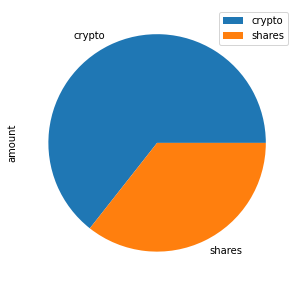

In [38]:
# Plot savings pie chart
df_savings.plot.pie(y = 'amount', figsize = (5, 5));

In [41]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = sum(list(df_savings['amount']))
total_savings

# Validate saving health
if total_savings == emergency_fund:
    print("Congratulations, you have reached your financial goal")
    print(f"{total_savings} = {emergency_fund}")
elif total_savings > emergency_fund:
    print("Congratulations, you have enough money for this fund!")
    print(f"{total_savings} > {emergency_fund}")
else:
    print("You require more money to enter this fund")
    print(f"{total_savings} < {emergency_fund}")
    print(f"{emergency_fund - total_savings} away from financial goal")

Congratulations, you have enough money for this fund!
130027.934 > 36000


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [54]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
end = datetime.now().strftime('%Y-%m-%d')
start = (datetime.now() - relativedelta(years=5)).strftime('%Y-%m-%d')

In [55]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(tickers, timeframe, start = start, end = end).df

# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                              open    high      low   close   volume    open   
time                                                                           
2021-07-20 00:00:00-04:00  116.780  116.82  116.320  116.39  7229222  425.68   
2021-07-21 00:00:00-04:00  116.075  116.15  115.920  116.02  7773071  432.34   
2021-07-22 00:00:00-04:00  116.030  116.35  116.030  116.29  6269656  434.74   
2021-07-23 00:00:00-04:00  116.030  116.22  116.030  116.21  4137100  437.53   
2021-07-26 00:00:00-04:00  116.300  116.33  116.085  116.11  7028009  439.31   

                                                               
                             high       low   close    volume  
time                                                           
2021-07-20 00:00:00-04:00  432.42  424.8300  431.04  87430308  
2021-07-21 00:00:00-04:00  434.70  431.0111  434.56  54251351  
2021-07-22 00:00:00-04:00  435.72  433.6900  435.50  41998182  
2021-07-23 00:00:00-04:00  440.30  436.7900  439.90  53294703  
2021-07-26 00:00:00-04:00  441.03  439.2600  440.99  40155852

In [56]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30 = MCSimulation(df_stock_data, weights = [0.4, 0.6], num_simulation=500, num_trading_days=252*30)

In [57]:
# Printing the simulation input data
display(df_stock_data)

AGG                                        \
                              open      high       low    close   volume   
time                                                                       
2021-07-20 00:00:00-04:00  116.780  116.8200  116.3200  116.390  7229222   
2021-07-21 00:00:00-04:00  116.075  116.1500  115.9200  116.020  7773071   
2021-07-22 00:00:00-04:00  116.030  116.3500  116.0300  116.290  6269656   
2021-07-23 00:00:00-04:00  116.030  116.2200  116.0300  116.210  4137100   
2021-07-26 00:00:00-04:00  116.300  116.3300  116.0850  116.110  7028009   
...                            ...       ...       ...      ...      ...   
2021-12-02 00:00:00-05:00  114.670  114.7900  114.4001  114.610  7507924   
2021-12-03 00:00:00-05:00  114.500  115.2400  114.4600  115.060  7279561   
2021-12-06 00:00:00-05:00  114.980  115.0391  114.6196  114.660  6364620   
2021-12-07 00:00:00-05:00  114.520  114.7100  114.4500  114.475  5783341   
2021-12-08 00:00:00-05:00  114.370  114.3700  114.0500  114.170  7416826   

                              SPY                                       
                             open    high       low   close     volume  
time                                                                    
2021-07-20 00:00:00-04:00  425.68  432.42  424.8300  431.04   87430308  
2021-07-21 00:00:00-04:00  432.34  434.70  431.0111  434.56   54251351  
2021-07-22 00:00:00-04:00  434.74  435.72  433.6900  435.50   41998182  
2021-07-23 00:00:00-04:00  437.53  440.30  436.7900  439.90   53294703  
2021-07-26 00:00:00-04:00  439.31  441.03  439.2600  440.99   40155852  
...                           ...     ...       ...     ...        ...  
2021-12-02 00:00:00-05:00  450.72  459.07  450.3100  457.38  109873511  
2021-12-03 00:00:00-05:00  459.17  460.30  448.9200  453.43  124795750  
2021-12-06 00:00:00-05:00  456.14  460.79  453.5600  458.78   88930961  
2021-12-07 00:00:00-05:00  464.41  468.88  458.6546  468.24   79124909  
2021-12-08 00:00:00-05:00  468.70  470.00  466.8300  469.54   62917411  

[100 rows x 10 columns]

In [58]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jordandass/Desktop/monash-fintech/Homework/Week 5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002872,1.001622,0.998215,0.999838,1.009813,1.003474,1.003062,1.000082,1.002820,0.999212,...,1.010276,0.998780,1.001160,1.001568,1.003279,1.003194,1.003801,0.998028,1.000641,1.000730
2,0.998991,0.996548,0.993597,0.998463,1.020469,1.003342,1.001035,0.993560,1.009109,0.995182,...,1.000711,1.002705,0.996537,1.004612,1.006417,1.003685,1.004522,0.996173,1.001852,1.005449
3,1.005184,0.996638,0.992461,1.005072,1.020832,1.005626,0.999750,0.988491,1.012899,0.999233,...,1.005367,1.003513,0.994694,1.006896,1.007306,0.996921,1.009543,0.996842,1.005593,1.008214
4,1.008883,0.998772,0.995821,1.010453,1.026418,1.007324,1.004305,0.991241,1.006272,1.001725,...,0.994467,1.003444,1.004471,0.997382,1.005809,0.999047,1.009141,1.007026,1.000960,1.006777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,36.841958,20.251756,22.670291,45.897311,28.042776,35.241162,20.461201,24.548163,23.960897,31.153775,...,77.447707,21.810391,27.005138,26.677867,30.268404,19.861179,22.467142,36.893163,17.630264,47.578693
7557,36.932723,20.339506,22.647559,46.117072,28.198060,35.268504,20.596223,24.435049,23.936343,31.165550,...,77.815035,21.689147,27.003127,26.778684,30.228063,19.779728,22.463592,36.931667,17.713942,47.592409
7558,37.063894,20.453428,22.819872,46.370823,28.173733,35.116002,20.593315,24.684027,24.077135,31.179282,...,77.806562,21.429569,27.027860,26.769799,30.287938,19.772498,22.386955,36.779192,17.633033,47.651916
7559,37.001972,20.458220,22.977315,46.600084,28.015870,35.129772,20.705014,24.778844,23.846114,31.067078,...,78.483344,21.470322,27.079715,26.845414,30.425924,19.737486,22.576937,36.931016,17.661694,47.811405


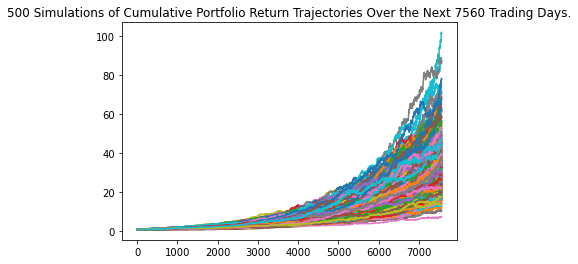

In [59]:
# Plot simulation outcomes
MC_30.plot_simulation();

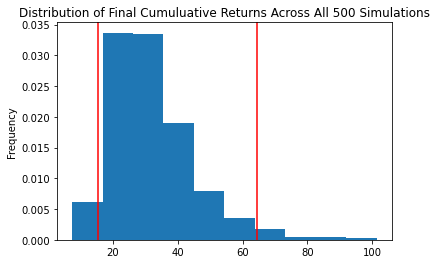

In [60]:
# Plot probability distribution and confidence intervals
MC_30.plot_distribution();

### Retirement Analysis

In [62]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_MC_30 = MC_30.summarize_cumulative_return()

# Print summary statistics
display(summary_MC_30)

count           500.000000
mean             31.976402
std              12.924978
min               7.444951
25%              22.836618
50%              29.305069
75%              38.420286
max             101.309741
95% CI Lower     15.278161
95% CI Upper     64.540670
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [64]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = initial_investment * summary_MC_30[8]
ci_upper = initial_investment * summary_MC_30[9]
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${round(ci_lower, 2)} and ${round(ci_upper, 2)}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $305563.21 and $1290813.41


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [65]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = initial_investment * summary_MC_30[8]
ci_upper = initial_investment * summary_MC_30[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${round(ci_lower, 2)} and ${round(ci_upper, 2)}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $458344.82 and $1936220.11


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [66]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5 = MCSimulation(df_stock_data, weights = [0.4, 0.6], num_simulation=500, num_trading_days=252*5)

In [67]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jordandass/Desktop/monash-fintech/Homework/Week 5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000473,0.999848,0.996901,0.999682,1.003278,0.995723,1.005357,0.999554,0.996260,1.012816,...,0.988696,0.997286,1.003550,1.004954,1.000367,1.000165,1.004383,0.995839,0.992768,1.007628
2,0.999354,0.999215,0.998467,1.002295,1.011152,0.991695,0.999391,1.003345,1.003269,1.019939,...,0.983671,1.000158,1.005151,1.008805,1.014218,1.003005,1.008265,1.003802,0.990772,1.008643
3,1.013130,1.004089,1.001896,1.004210,1.016063,0.990278,1.003334,1.001493,0.991207,1.020200,...,0.990385,1.004689,1.004033,1.010809,1.019239,1.001090,0.999617,1.001692,0.992693,1.008134
4,1.015918,1.010338,1.003258,1.004571,1.011735,0.992598,0.993908,1.003035,0.994882,1.017342,...,0.991810,1.001866,0.999624,1.010296,1.021745,1.001243,1.003886,0.997390,0.981008,0.993466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.440552,1.937131,2.030717,1.106974,1.680870,1.585119,1.600439,1.141950,2.137737,1.971584,...,1.603163,1.433973,1.889493,1.426617,1.490048,1.849474,1.675810,1.584329,1.583056,1.363205
1257,1.446397,1.936790,2.044681,1.109578,1.678239,1.587452,1.608476,1.139118,2.137204,1.967238,...,1.604398,1.430667,1.879315,1.423410,1.483907,1.853760,1.678477,1.578628,1.584972,1.352955
1258,1.451194,1.937267,2.040106,1.118287,1.664218,1.596746,1.615860,1.132709,2.146263,1.950556,...,1.603263,1.426864,1.882024,1.413924,1.478916,1.862930,1.682057,1.591647,1.579687,1.357398
1259,1.451211,1.951191,2.054417,1.124522,1.676685,1.577293,1.605759,1.142425,2.166710,1.961560,...,1.612815,1.432789,1.876498,1.412754,1.479058,1.851653,1.682250,1.610332,1.593895,1.363549


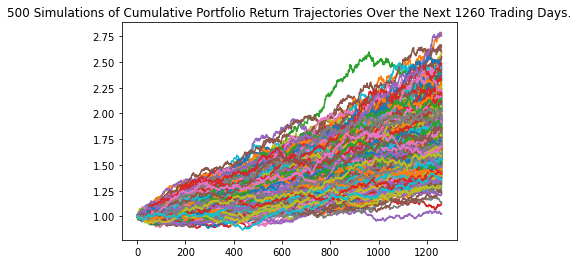

In [69]:
# Plot simulation outcomes
MC_5.plot_simulation();

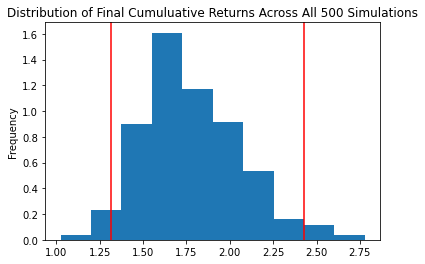

In [70]:
# Plot probability distribution and confidence intervals
MC_5.plot_distribution();

In [71]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_MC_5 = MC_5.summarize_cumulative_return()
# Print summary statistics
display(summary_MC_5)

count           500.000000
mean              1.777111
std               0.282914
min               1.025051
25%               1.583928
50%               1.746874
75%               1.952272
max               2.778504
95% CI Lower      1.317987
95% CI Upper      2.429666
Name: 1260, dtype: float64

In [72]:
# Set initial investment
initial_investment = 60_000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = initial_investment * summary_MC_5[8]
ci_upper = initial_investment * summary_MC_5[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${round(ci_lower, 2)} and ${round(ci_upper, 2)}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $79079.22 and $145779.96


### Ten Years Retirement Option

In [73]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10 = MCSimulation(df_stock_data, weights = [0.4, 0.6], num_simulation=500, num_trading_days=252*10)

In [74]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jordandass/Desktop/monash-fintech/Homework/Week 5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998904,1.003162,0.999373,0.996346,0.997982,1.006926,1.003472,0.992691,1.010475,1.004531,...,0.985676,0.994409,0.999815,1.007645,0.999336,1.004550,0.995502,1.001833,0.995192,1.002459
2,0.998927,1.004718,0.998849,0.990426,0.992349,1.011217,0.998889,0.995866,1.008083,0.996022,...,0.991479,0.988478,1.006266,1.003703,1.010403,1.001925,1.003199,0.998772,0.992324,1.004227
3,1.000622,0.992672,0.995394,0.991778,0.996933,1.011964,0.993097,1.003458,1.007341,0.996441,...,0.996993,0.997441,1.007048,1.001958,1.014406,0.998475,0.998218,1.000196,0.993069,1.011867
4,1.001672,0.992516,0.994329,0.991753,1.000388,1.010394,0.995735,0.999559,1.010174,0.996462,...,1.003497,0.996218,1.006189,1.000131,1.018403,1.002767,0.998999,1.003034,0.989697,1.012254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.162056,4.146276,3.020934,2.574529,2.888976,4.288966,3.054561,2.223900,3.433491,2.506719,...,4.546551,2.790828,2.163851,4.639125,1.867724,4.010115,3.561023,3.485676,2.643427,3.149179
2517,3.138754,4.140992,3.017757,2.565139,2.869335,4.290787,3.050548,2.217831,3.428428,2.505421,...,4.530887,2.775417,2.149004,4.620987,1.880358,4.008435,3.566402,3.477970,2.633263,3.144351
2518,3.142879,4.133056,2.999725,2.569803,2.863772,4.241390,3.064895,2.219105,3.430917,2.524469,...,4.519457,2.751872,2.158019,4.633927,1.876448,3.999647,3.556721,3.458517,2.625734,3.146778
2519,3.132202,4.122824,2.995636,2.596084,2.855984,4.244527,3.043594,2.210722,3.439186,2.528271,...,4.525478,2.740788,2.163672,4.657675,1.879635,4.003015,3.562719,3.472817,2.632327,3.146101


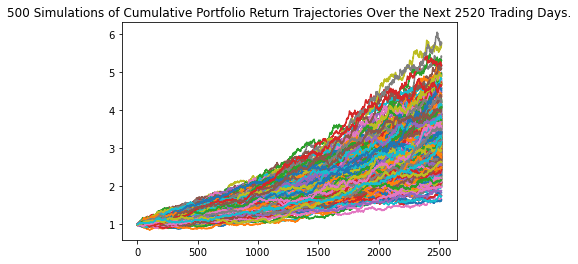

In [76]:
# Plot simulation outcomes
MC_10.plot_simulation();

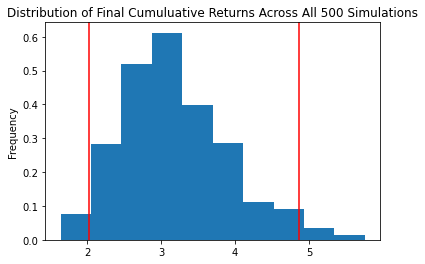

In [77]:
# Plot probability distribution and confidence intervals
MC_10.plot_distribution();

In [78]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_MC_10 = MC_10.summarize_cumulative_return()

# Print summary statistics
display(summary_MC_10)

count           500.000000
mean              3.181095
std               0.724697
min               1.637437
25%               2.658846
50%               3.103893
75%               3.616219
max               5.755830
95% CI Lower      2.026093
95% CI Upper      4.858701
Name: 2520, dtype: float64

In [79]:
# Set initial investment
initial_investment = 60_000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = initial_investment * summary_MC_10[8]
ci_upper = initial_investment * summary_MC_10[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${round(ci_lower, 2)} and ${round(ci_upper, 2)}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $121565.6 and $291522.04
